# Heart Disease Modeling Project  
**Data Science Fundamentals with Python – July 2025**

Himanshu Shete(23B0770)

This project uses the UCI Heart Disease dataset to explore core data science techniques: classification, regression, dimensionality reduction, and unsupervised clustering.

In [39]:
import pandas as pd
import numpy as np

# column names based on UCI documentation
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(url, names=columns)

# Replacing '?' with NaN and converting columns to numeric
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric)

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 3.1 EDA & Data Preprocessing


In [40]:
# Basic info
print(df.info())
print(df.describe())

# to count missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

- Columns `ca` and `thal` have missing values.
- All values are numeric.
- Target column `num` ranges from 0 to 4.

In [41]:
# Impute missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert 'num' column to binary: 0 → 0, 1-4 → 1
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)


- Missing values have been imputed using median.
- `num` column is now binary (0 = No disease, 1 = Disease).

In [42]:
# Feature Normalization
from sklearn.preprocessing import StandardScaler

X = df.drop('num', axis=1)
y = df['num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


- Features normalized using StandardScaler.

## 3.2 Heart Disease Prediction (Classification)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [44]:
# Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

[[25  4]
 [ 3 29]]

Random Forest Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[26  3]
 [ 5 27]]


- Logistic Regression gives a good baseline.
- Random Forest improves recall and F1-score.
- Choose model based on false negative tolerance.

## 3.3 Cholesterol Level Prediction (Regression)


In [45]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Target: 'chol', Features: all except 'chol'
X_chol = df.drop(['chol'], axis=1)
y_chol = df['chol']

# Normalize X
X_chol_scaled = scaler.fit_transform(X_chol)

# Train-Test Split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_chol_scaled, y_chol, test_size=0.2, random_state=42)

# Linear Regression
lr_chol = LinearRegression()
lr_chol.fit(Xc_train, yc_train)
print(f"R^2 score: {lr_chol.score(Xc_test, yc_test):.4f}")


R^2 score: 0.1069


- R² score shows how well other features explain cholesterol level.
- A lower value indicates poor prediction capacity.

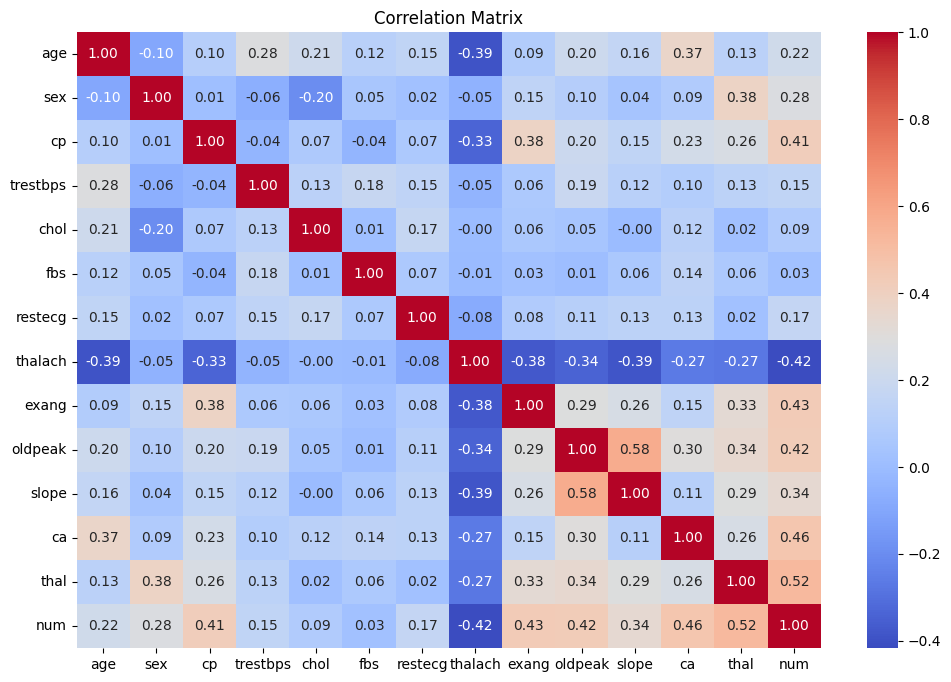

In [46]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


- `age` and `trestbps` may be weakly correlated with `chol`.
- Most features have weak correlation with cholesterol.

## 3.4 Principal Component Analysis (PCA)

Original Shape: (303, 13)
Reduced Shape: (303, 12)


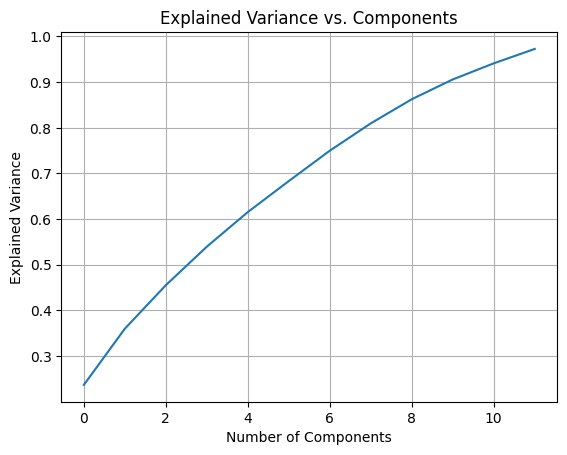

In [47]:
from sklearn.decomposition import PCA

# Normalize features again
X_norm = scaler.fit_transform(df.drop('num', axis=1))

# PCA for 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_norm)

print(f"Original Shape: {X_norm.shape}")
print(f"Reduced Shape: {X_pca.shape}")

# Explained variance plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Components')
plt.grid(True)
plt.show()


- Dimensionality reduced from 13 → ~8 components.
- 95% variance retained, useful for clustering.

## 3.5 Clustering (KMeans on PCA data)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

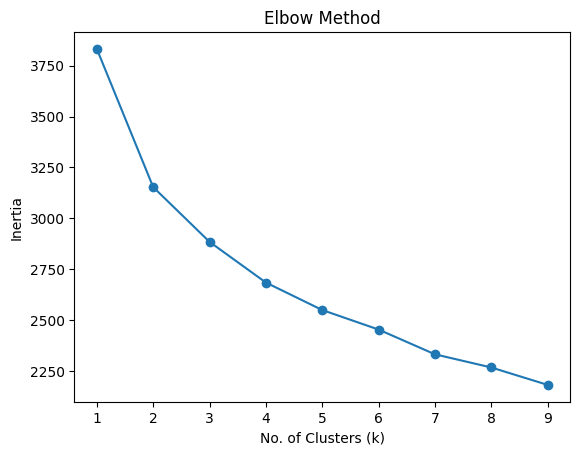

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method
inertia = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel("No. of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [49]:
# Silhouette score for 2-9 clusters
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    preds = km.fit_predict(X_pca)
    score = silhouette_score(X_pca, preds)
    print(f"k = {k}, Silhouette Score = {score:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

k = 2, Silhouette Score = 0.1796
k = 3, Silhouette Score = 0.1343
k = 4, Silhouette Score = 0.1383
k = 5, Silhouette Score = 0.1172
k = 6, Silhouette Score = 0.1164
k = 7, Silhouette Score = 0.1186
k = 8, Silhouette Score = 0.1137
k = 9, Silhouette Score = 0.1163


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- Elbow method + silhouette scores suggest optimal clusters (typically k=2 or 3).
- Helps find patient subgroups.

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


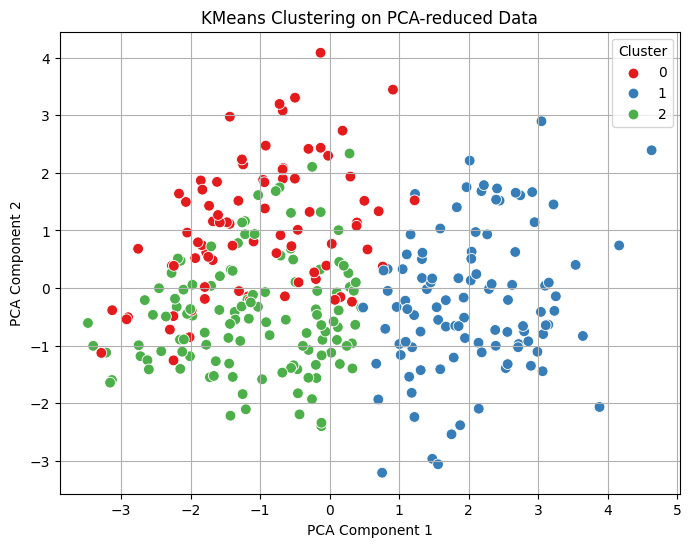

In [50]:
# Final clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plotting the first 2 PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1', s=60)
plt.title("KMeans Clustering on PCA-reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### Inference:
- PCA + KMeans clusters patients by health profile.
- Can aid doctors in stratifying patient risk groups.